In [2]:
import pandas as pd

df = pd.DataFrame({"Modelo" : [1, 2, 3, 4, 5, 6, 7, 8], "Score" : [-13.160, -12.570, -10.792, -10.602, -10.596, -10.521, -10.442, -10.229]})
df

,Modelo,Score
0,1,-13.160
1,2,-12.570
2,3,-10.792
3,4,-10.602
4,5,-10.596
5,6,-10.521
6,7,-10.442
7,8,-10.229


<AxesSubplot:xlabel='Modelo'>

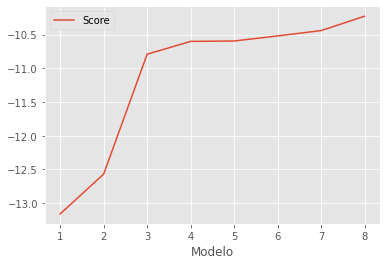

In [4]:
df.plot.line(x="Modelo")


In [31]:
#Para realizar esta lección vamos a necesitar dos nuevas bibliotecas: Seaborn y scikit-learn

import seaborn
import sklearn


In [33]:
#Para continuar aprendiendo qué es y cómo se implementa un modelo de regresión lineal simple, utilizaremos un lote de datos bien conocido.
#Para ello, vamos primero a importar algunas bibliotecas, además de nuestra ya bien conocida pandas:

#🔢 scipy: una biblioteca de algoritmos matemáticos, muy útiles en el campo de la ciencia de datos;
#📈 seaborn, matplotlib: herramientas de graficación que complementan y extienden a las operaciones .plot provistas por pandas;
#🤖 sklearn (abreviatura de scikit-learn): una popular biblioteca con algoritmos de aprendizaje automático, entre los cuales se encuentra, obviamente, soporte para regresión lineal 🎊


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# configuraciones opcionales para hacer a nuestros 
# gráficos más "bonitos"
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')


In [19]:
#Antes de analizar las relaciones entre dos variables tenemos que ... ¡descubrir cuales están relacionadas! 😛

#Si bien no existe una respuesta taxativa a esta pregunta, una buena primera forma de aproximarse es generar una matriz de correlación, que nos dirá el grado en que los cambios de cualquiera de las variables acompañan los cambios de cualquiera de las otras ↔️. 
#Para ello, los DataFrames cuentan con la operación corr:

correlaciones = df.corr()
correlaciones

#Esta matriz mostrará, por cada par de variables, cuán relacionadas están en una escala de -1 a 1, siendo:
#1: altamente correlacionadas y directamente proporcionales. ↗️ Si una variable crece, la otra también;
#0: sin ningún tipo de correlación. 🤷 Los cambios en una no parecen influir en la otra;
#-1: altamente correlacionadas e inversamente proporcionales. ↘️ Si una variable crece, la otra decrece.


,Modelo,Score
Modelo,1.000000,0.844851
Score,0.844851,1.000000


In [21]:
correlaciones['Score']    #En términos absolutos, la correlación entre estas dos variables es mayor a 0.5 (recordemos que 0 representa la no-correlación y 1, la correlación máxima);
                          #Y además la correlación es de signo positivo, lo que indica una relación directa.

Modelo    0.844851
Score     1.000000
Name: Score, dtype: float64

<AxesSubplot:>

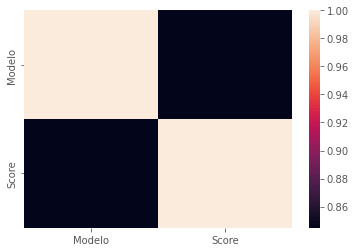

In [22]:
#Otra forma útil de visualizar estas correlaciones es mediante un mapa de calor 🥵, que asigne puntos más claros a aquellos pares con mayor correlación:

sns.heatmap(correlaciones.abs())


<AxesSubplot:xlabel='Modelo', ylabel='Score'>

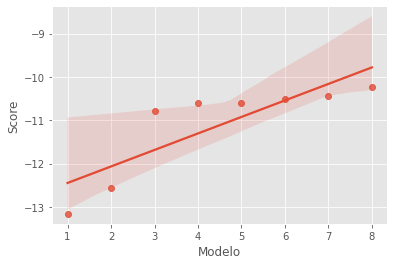

In [23]:
#Todo parece indicar que existe un vínculo entre el Modelo y el Score de este lote de datos. 
#Con esto en mente, ya podemos intentar expresar este vínculo como Score = f(Modelo), siendo f una función lineal, ¿no? 😀

#Bueno, si bien tenemos elementos para explorar esa posibilidad, no nos apresuremos 🐢. La relación podría aún no ser lineal, o incluso podría no ser significativa y deberse a, lisa y llanamente, la casualidad. 

#Por eso, antes de continuar haremos algunas pruebas más. 
#📈 Primero, graficaremos las observaciones empleando un regplot, que combina un gráfico de dispersión y superpone los resultados sobre una recta ideal de regresión:


# Gráfico de dispersión + regresión, realizado con seaborn 
#combina un gráfico de dispersión y superpone los resultados sobre una recta ideal de regresión:
sns.regplot(x="Modelo", y="Score", data=df)


In [16]:
# Coeficiente de correlación de Pearson y su valor P
#El primero es nuevamente, una medida de co-variación entre las variables, tal que valores absolutos cercanos a 1 indican alta correlación, mientras que los cercanos a 0 indican correlación baja;
#El segundo es una medida de confianza que nos dirá cuán probable es que los resultados sean producto de la casualidad. Cuanto más cercana a cero, menos probable es que el resultado sea producto del azar. 
#En la práctica se suele considerar no significativo a cualquier resultado con pvalue por encima de 0.05 (o 0.01, si se busca más rigor).
corr, pvalue = pearsonr(
  x = df['Modelo'], 
  y = df['Score'])
print("Coeficiente de correlación de Pearson:", corr) 
print("P-value:", pvalue) 


#El resultado es significativo y el valor de pearsonr coincide con el obtenido mediante corr() debido a que corr() utiliza por defecto el método de Pearson ('pearson')...
#El p-valor es cercano a cero, indicando que el resultado no es producto del azar. p-valor < 0.05 es significativo.


Coeficiente de correlación de Pearson: 0.8448507044302611
P-value: 0.008283899402752945


In [4]:
#Ahora que validamos gráfica y numéricamente que la correlación es significativa (aunque medianamente fuerte ≈ 0.84), podemos finalmente desarrollar (o como se suele decir frecuentemente, ajustar) nuestro modelo de regresión lineal simple. 

#💺 Ajustar al modelo consiste en estimar, a partir de los datos disponibles:

#la recta que minimice la distancia ε entre las observaciones de x y ésta;
#encontrar los valores de los coeficientes de regresión que maximizan la probabilidad de que la recta prediga los valores observados.
#El método más utilizado para ésto es el de mínimos cuadrados ordinarios (o OLS, por sus siglas en inglés) y scikit-learn lo implementa mediante LinearRegression():

X = df[['Modelo']]
y = df['Score']

modelo = LinearRegression()
modelo.fit(X = X.values, y = y)




LinearRegression()

In [5]:
#Como vemos, primero debemos crear un modelo y seguidamente ajustarlo utilizando su operación fit, indicando los valores de X e y. 
#Luego podremos imprimir los valores encontrados de ordenada al origen (intercept_) y la pendiente (el primer valor del vector coef_):

print("Ordenada:", modelo.intercept_)
print("Pendiente:", list(zip(X.columns, modelo.coef_.flatten())))


Ordenada: -12.827
Pendiente: [('Modelo', 0.3806666666666668)]


In [6]:
#¿Terminamos? Sí y no . Sí, por un lado pudimos establecer que existe un vínculo entre ambas variables (corr ≈ 0.84) y que dicho vínculo no parece el mero producto del azar (pvalue ≪ 0.05), y por otro pudimos aproximarlo a una recta, Pero aún estamos lejos de haber evaluado completamente al modelo. 🙃

#❓ ¡Es que aún hay muchas cosas que no sabemos! Por ejemplo: ¿cuán bueno es el modelo? ¿Los datos caen efectivamente en la recta? ¿Cuánto se alejan de ella?

#Una primera aproximación a las dos primeras preguntas es utilizar la métrica R2, que nos indica cuán bueno es el ajuste del modelo.
#Esta medida estadística oscila entre 0 (los datos predicho no se ajustan a las observaciones) y 1 (los datos predichos se ajustan perfectamente a las observaciones).

#La operación score de nuestro modelo nos retornará justamente esta métrica (que dicho sea de paso, en los modelos de regresión lineal simple su valor se corresponde con el cuadrado de la correlación de Pearson 💡):

print("Coeficiente de determinación R²:", modelo.score(X.values, y)) 

#Como vemos, el R² nos indica que el modelo es medianamente bueno.


Coeficiente de determinación R²: 0.7137727127763094


In [ ]:
#Como vemos, R2 arrojó un valor más bien medio (≈ 0.71). 
#Eso no significa necesariamente que el modelo sea inválido, sino que la relación lineal encontrada explica de bastante completo a la variable y, aunque podría ser mejor su correlación. 


